## Crop and Fertilizer Recommendation System using ML

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:

crop = pd.read_csv("dataset/Crop_recommendation.csv")


print(crop.info())
print(crop.describe())


print(crop.isnull().sum())

crop = crop.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

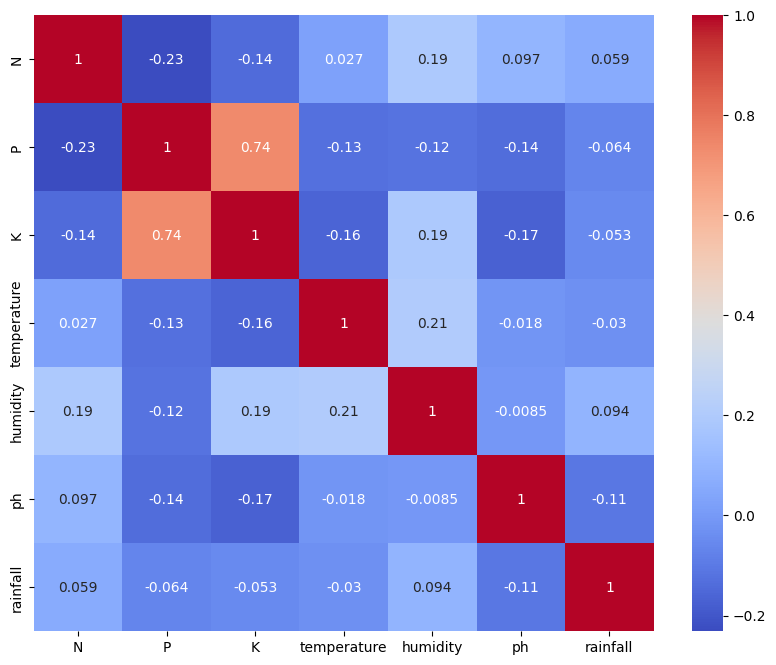

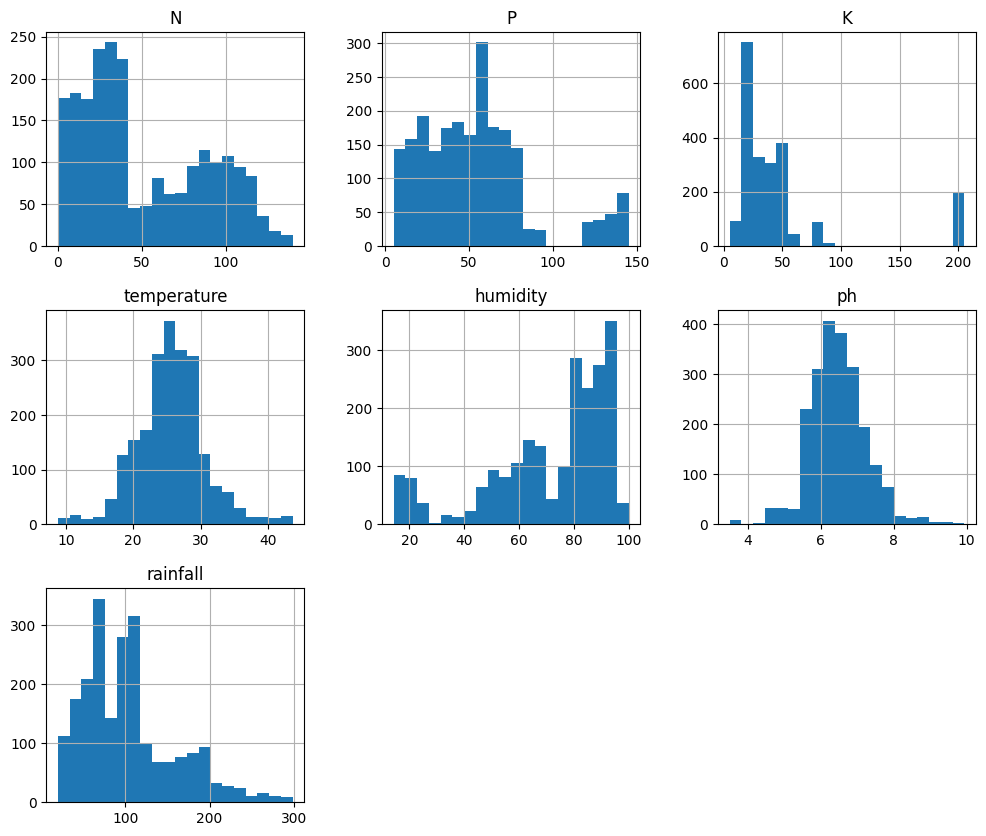

In [3]:

numeric_columns = crop.select_dtypes(include=np.number)


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.show()

numeric_columns.hist(bins=20, figsize=(12, 10))
plt.show()



In [4]:
# Encoding categorical data if present
if 'Soil_Type' in crop.columns:
    le = LabelEncoder()
    crop['Soil_Type'] = le.fit_transform(crop['Soil_Type'])

# Splitting data into features and target
X = crop.drop('label', axis=1)  # Features
y = crop['label']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

In [5]:
# Fertilizer recommendation dictionary
fertilizer_recommendation = {
    'Wheat': 'Urea, NPK',
    'Rice': 'DAP, Potash',

}

def recommend_fertilizer(crop_name):
    return fertilizer_recommendation.get(crop_name, "No recommendation available")

def predict_crop(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prediction = model.predict(input_df)
    return prediction[0]

user_input = {'N': 50, 'P': 40, 'K': 20, 'temperature': 30, 'humidity': 70, 'ph': 6.5, 'rainfall': 200}
recommended_crop = predict_crop(user_input)
print("Recommended crop:", recommended_crop)
print("Recommended fertilizers:", recommend_fertilizer(recommended_crop))


Recommended crop: pigeonpeas
Recommended fertilizers: No recommendation available


In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9931818181818182
